In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from utils import OptimizedControlResults
import pandas as pd
import numpy as np

In [ ]:
markevery=500
results_dir = Path('simulation_results')

In [ ]:
scenarios = {
    1: {
        'simulation_dir': results_dir / 'job_cheap_cloud_constant_demand',
        'marker': 'o'
    },
    2: {
        'simulation_dir': results_dir / 'job_expensive_cloud_constant_demand',
        'marker': 's'
    },
    3: {
        'simulation_dir': results_dir / 'job_cheap_cloud_normal_dist_demand',
        'marker': '^'
    },
    4: {
        'simulation_dir': results_dir / 'job_expensive_cloud_normal_dist_demand',
        'marker': '*'
    },
}
for scenario_id, scenario_data in scenarios.items():
    results = OptimizedControlResults.from_json(scenario_data['simulation_dir'] / 'optimization_results.json')
    scenarios[scenario_id]['results'] = results
    scenarios[scenario_id]['df'] = pd.read_parquet(scenario_data['simulation_dir'] / f'simulation_{results.best_iteration:03d}.parquet')

In [34]:
def add_hyperparameters(ax, results: OptimizedControlResults):
    # best_controller_params_txt = ', '.join(f'{p:.4f}' for p in results.best_controller_params)
    # lines = ax.plot([], [], ' ', label=rf'$K_{{opt}}$ = {best_controller_params_txt}')
    lines = ax.plot([], [], ' ', label=f'Profit = {-results.best_cost:.4f}')
    initial_controller_params_txt = ', '.join(f'{p:.2f}' for p in results.initial_controller_params)
    lines += ax.plot([], [], ' ', label=f'$K_{{0}}$ = {initial_controller_params_txt}')
    lines += ax.plot([], [], ' ', label=f'N = {results.queue_size}')
    lines += ax.plot([], [], ' ', label=f'$\\beta$ = {results.cloud_service_rate_cost:.2f}')
    lines += ax.plot([], [], ' ', label=f'$\\alpha$ = {results.arrival_rate_revenue:.2f}')
    lines += ax.plot([], [], ' ', label=f'$T_S$ = {results.seconds:.2f}')
    return lines

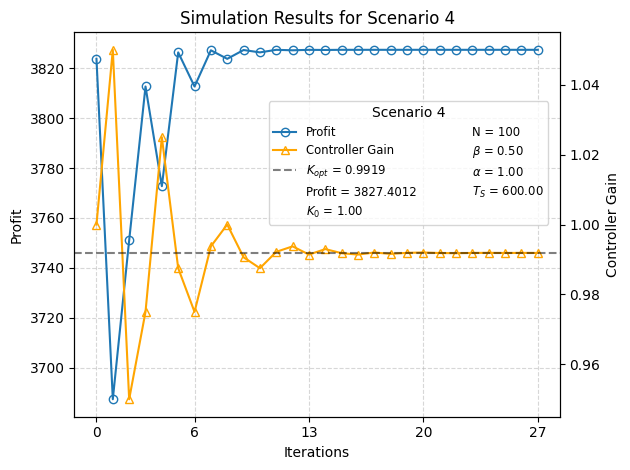

In [39]:
plot_scenario = 4
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=0.5)
lines = ax.plot(-scenarios[plot_scenario]['results'].costs, label='Profit',
                markerfacecolor='None', marker='o')
twinx = ax.twinx()
lines += twinx.plot(scenarios[plot_scenario]['results'].controller_params[:, 0],
                    label='Controller Gain', color='orange',
                    marker='^', markerfacecolor='None')
lines.append(twinx.axhline(scenarios[plot_scenario]['results'].best_controller_params[0],
                           linestyle='--', color='k', alpha=.5,
                           label=f'$K_{{opt}}$ = {scenarios[plot_scenario]['results'].best_controller_params[0]:.4f}'))
ax.set(
    title=f'Simulation Results for Scenario {plot_scenario}',
    xlabel='Iterations',
    ylabel='Profit',
    xticks=np.linspace(0, len(scenarios[plot_scenario]['results'].costs) - 1, 5,
                       dtype=int),
)
twinx.set_ylabel('Controller Gain')
lines += add_hyperparameters(ax, scenarios[plot_scenario]['results'])
ax.legend(lines, [line.get_label() for line in lines],
          ncol=2, fontsize='small', loc=(0.4, 0.5),
          title=f'Scenario {plot_scenario}')
fig.tight_layout()
fig.savefig(scenarios[plot_scenario]['simulation_dir'] /
            'simulation_progression.png', dpi=300)

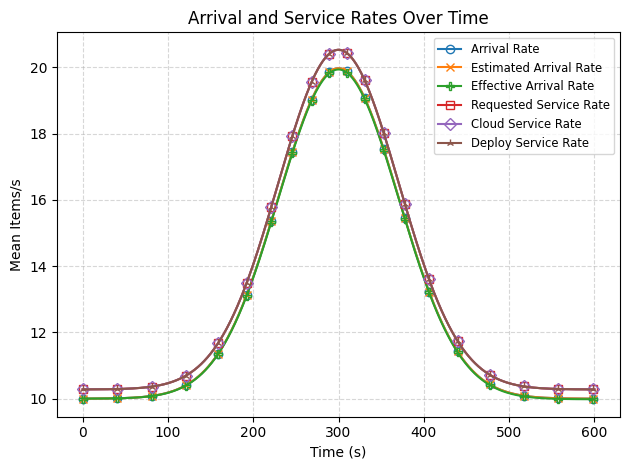

In [19]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=.5)
ax.plot(simulation_df['time'], simulation_df['arrival_rate'], label='Arrival Rate',
        marker='o', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['estimated_arrival_rate'], label='Estimated Arrival Rate',
        marker='x', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['effective_arrival_rate'], label='Effective Arrival Rate',
        marker='P', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['requested_service_rate'], label='Requested Service Rate',
        marker='s', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['cloud_service_rate'], label='Cloud Service Rate',
        marker='D', markevery=markevery, markerfacecolor='None')
ax.plot(simulation_df['time'], simulation_df['deploy_service_rate'], label='Deploy Service Rate',
        marker='2', markevery=markevery, markerfacecolor='None')
# add_hyperparameters(ax)
ax.legend(fontsize='small', ncol=1)
ax.set(
    xlabel='Time (s)',
    ylabel='Mean Items/s',
    title='Arrival and Service Rates Over Time'
)
fig.tight_layout()
fig.savefig(results_dir / 'producer_consumer_lambda.png', dpi=300)

/tmp/ipykernel_268247/1893540904.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend(fontsize='small', ncol=2)


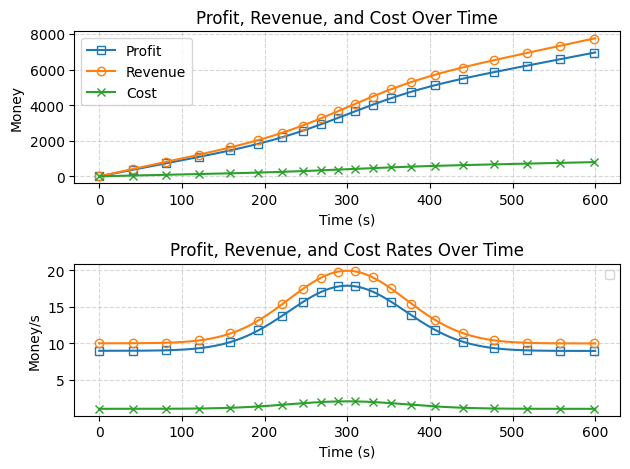

In [20]:
fig, ax = plt.subplots(2, 1)
ax[0].grid(linestyle='--', alpha=.5)
profit_line = ax[0].plot(simulation_df['time'], simulation_df['integrated_profit'], label='Profit',
                         marker='s', markevery=markevery, markerfacecolor="None")
revenue_line = ax[0].plot(simulation_df['time'], simulation_df['integrated_revenue'], label='Revenue',
                          marker='o', markevery=markevery, markerfacecolor="None")
cost_line = ax[0].plot(simulation_df['time'], simulation_df['integrated_cost'], label='Cost',
                       marker='x', markevery=markevery)
ax[0].legend()
ax[0].set(
    xlabel='Time (s)',
    ylabel='Money',
    title='Profit, Revenue, and Cost Over Time'
)
ax[1].grid(linestyle='--', alpha=.5)
ax[1].plot(simulation_df['time'], simulation_df['profit'], color=profit_line[0].get_color(),
           marker=profit_line[0].get_marker(), markevery=markevery,
           markerfacecolor=profit_line[0].get_markerfacecolor())
ax[1].plot(simulation_df['time'], simulation_df['revenue'], color=revenue_line[0].get_color(),
           marker=revenue_line[0].get_marker(), markevery=markevery,
           markerfacecolor=revenue_line[0].get_markerfacecolor())
ax[1].plot(simulation_df['time'], simulation_df['cost'], color=cost_line[0].get_color(),
           marker=cost_line[0].get_marker(), markevery=markevery,
           markerfacecolor=cost_line[0].get_markerfacecolor())
ax[1].set(ylabel='Money/s',
          xlabel='Time (s)',
          title='Profit, Revenue, and Cost Rates Over Time')
# add_hyperparameters(ax[1])
ax[1].legend(fontsize='small', ncol=2)
fig.tight_layout()
fig.savefig(results_dir / 'money_over_time.png', dpi=300)

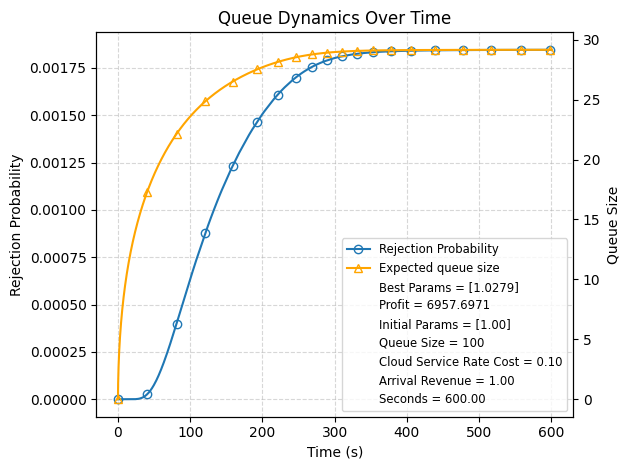

In [21]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=.5)
lines = ax.plot(simulation_df['time'], simulation_df['queue_size_prob_100'], label='Rejection Probability',
                marker='o', markevery=markevery, markerfacecolor='None')
ax.set(
    xlabel='Time (s)',
    ylabel='Rejection Probability',
    title='Queue Dynamics Over Time'
)
twinx = ax.twinx()
lines += twinx.plot(simulation_df['time'], simulation_df['expected_queue_size'], label='Expected queue size',
                    color='orange', marker='^', markevery=markevery, markerfacecolor='None')
lines += add_hyperparameters(ax)
twinx.set_ylabel('Queue Size')
ax.legend(lines, [line.get_label() for line in lines],
          ncol=1, fontsize='small')
fig.tight_layout()
fig.savefig(results_dir / 'queue_dynamics.png', dpi=300)

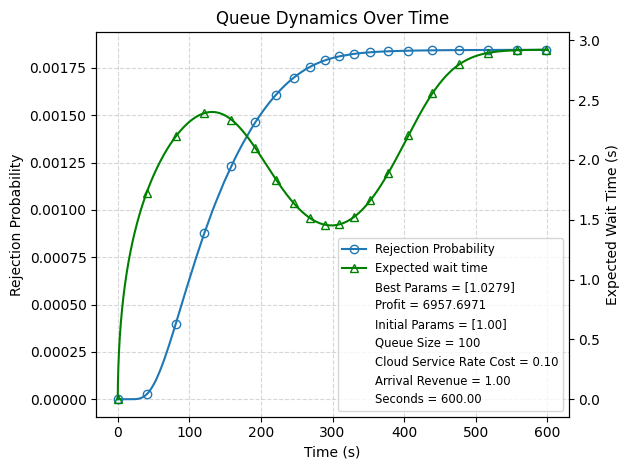

In [22]:
fig, ax = plt.subplots()
ax.grid(linestyle='--', alpha=.5)
lines = ax.plot(simulation_df['time'], simulation_df['queue_size_prob_100'], label='Rejection Probability',
                marker='o', markevery=markevery, markerfacecolor='None')
ax.set(
    xlabel='Time (s)',
    ylabel='Rejection Probability',
    title='Queue Dynamics Over Time'
)
twinx = ax.twinx()
lines += twinx.plot(simulation_df['time'], simulation_df['expected_wait_time'], label='Expected wait time',
                    color='green', marker='^', markevery=markevery, markerfacecolor='None')
lines += add_hyperparameters(ax)
twinx.set_ylabel('Expected Wait Time (s)')
ax.legend(lines, [line.get_label() for line in lines],
          ncol=1, fontsize='small')
fig.tight_layout()
fig.savefig(results_dir / 'queue_wait_time.png', dpi=300)

In [ ]:
fig, ax = plt.subplots()
ax.set(
    xlabel='Time (s)',
    ylabel='Rejection Probability',
    title='Queue Rejection Probability Over Time'
)
ax.grid(linestyle='--', alpha=.5)
for scenario_id, scenario_data in scenarios.items():
    ax.plot(scenario_data['df']['time'], scenario_data['df']['queue_size_prob_100'],
            label=f'Scenario {scenario_id}',
            marker=scenario_data['marker'], markevery=markevery, markerfacecolor='None')
ax.legend(ncol=1, fontsize='small')
fig.tight_layout()
fig.savefig(results_dir / 'queue_rejection_probability.png', dpi=300)